In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from factor_analyzer import FactorAnalyzer
from sklearn.decomposition import PCA
#from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
#from factor_analyzer.factor_analyzer import calculate_kmo
import scipy as sci
import matplotlib
from sklearn.cluster import KMeans

import analysis as ana
import plot as pl

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

In [3]:
import matplotlib as mpl
from matplotlib import rc

rc('text', usetex=False)
font = {#'family':'CMU Serif', 
               #'sans-serif':['Helvetica'],
               'size': 11}
#mpl.rc('font', **font)

# Lodaing Data

In [13]:
cog_data_z, subj_data = ana.load_data('../data_zscore')
cog_data, subj_data_ = ana.load_data('../data')

# removing control
cog_data_con = cog_data[subj_data.phenotype == 0]
cog_data_z = cog_data_z[subj_data.phenotype != 0]

cog_data = cog_data[subj_data.phenotype != 0]

subj_data = subj_data[subj_data.phenotype != 0]

'In good health': 0, 

'Affective psychosis': 1, 

'Non-affective psychosis': 2

In [5]:
subj_data['phenotype_description'].value_counts()

phenotype_description
2    118
1     52
Name: count, dtype: int64

# PCA

### cognitive features

In [16]:
pca = PCA(5)
pca.fit_transform(cog_data_z)
components = pca.components_
cog_data_z_pca = pca.transform(cog_data_z) # project the original data into the PCA space

# Fuzzy Clustering

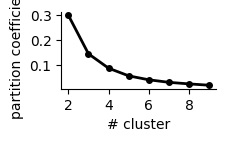

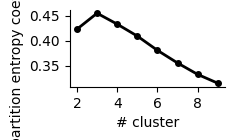

In [8]:
K, pc_list, pec_list = ana.get_partition(cog_data_z_pca, 9)
pl.plot_clustering_validation(K, pc_list, 'partition coefficient')
pl.plot_clustering_validation(K, pec_list, 'partition entropy coefficient')

patient Data, cog-PCA (z)


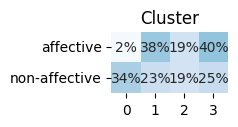

In [29]:
print('patient Data, cog-PCA (z)')
predict_4, df = ana.Fuzzy(cog_data_z_pca, 4,patients_only=True)
pl.plot_cluster_result(df,4,patients_only=True)
plt.savefig('fig/clu_result_pat4.svg', dpi=500, bbox_inches='tight')

patient Data, cog-PCA (z)


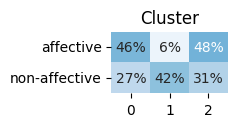

In [55]:
print('patient Data, cog-PCA (z)')
predict_3, df = ana.Fuzzy(cog_data_z_pca, 3,patients_only=True)
pl.plot_cluster_result(df,3,patients_only=True)
plt.savefig('fig/clu_result_pat3.svg', dpi=500, bbox_inches='tight')

In [56]:
clu_pat_result = pd.DataFrame(index=cog_data.index)
clu_pat_result['predict_pat'] = predict_3
# clu_pat_result = clu_pat_result.append(cog_data_con['phenotype_description'])
# clu_pat_result.loc[subj_data_.phenotype == 0, 'predict_all'] = 'c'
# clu_pat_result['phenotype_description'] = subj_data_['phenotype_description']
clu_pat_result['phenotype_description'] = subj_data['phenotype_description']
clu_pat_result.to_csv('clu_results/3clu_result_pat.txt', sep=',')

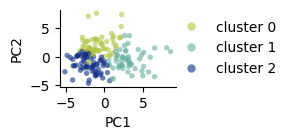

In [59]:
pl.plot_data_2D(cog_data_z_pca, group=predict_3, cluster=True)
plt.savefig('fig/clu_data_cog_pat.svg', dpi=500, bbox_inches='tight')

In [35]:
clu_pat_result['predict_pat'].value_counts()

predict_pat
2    62
0    56
1    52
Name: count, dtype: int64

# Cluster Analysis

In [34]:
clinical_data = pd.read_csv('../data/clinical.txt', index_col=0)
clinical_data = clinical_data.reindex(subj_data_.index)
clinical_data = clinical_data[subj_data_.phenotype != 0]

In [35]:
clinical_data['cluster'] = predict_all
clu_0, clu_1, clu_2 = ana.get_cluster_data(clinical_data, 0), ana.get_cluster_data(clinical_data, 1), ana.get_cluster_data(clinical_data, 2)
col_panss = ['panss_total','panss_pos','panss_neg','general']
col_panss_names = ['PANSS total', 'PANSS positiv', 'PANSS negativ', 'general psychopathology']
df_comparison = ana.group_comparison(clinical_data, col_panss, cluster=True)

In [36]:
df_comparison

,panss_total,panss_pos,panss_neg,general
test,,,,
group,"[16.9774, 0.0002]","[2.0508, 0.3587]","[23.0787, 0.0]","[8.4847, 0.0144]"
0-1,"[1.1148, 0.3201]",-,"[1.989, 0.175]","[1.9577, 0.201]"
0-2,"[16.0468, 0.0]",-,"[22.2302, 0.0]","[7.8965, 0.0036]"
1-2,"[6.8698, 0.0107]",-,"[8.2082, 0.0049]","[2.0398, 0.1986]"


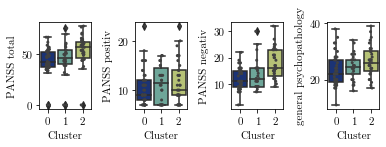

In [104]:
pl.plot_boxplots(clinical_data, col_panss, col_panss_names, 1,4)
plt.savefig('fig/clu_panss_pat.svg', dpi=500, bbox_inches='tight')

## all features

In [78]:
cog_data_cluster = cog_data.copy()
cog_data_cluster['cluster'] = predict_all
cog_data_cluster = cog_data_cluster.append(cog_data_con)
cog_data_cluster.loc[subj_data_.phenotype == 0, 'cluster'] = 'c'
col_cog = list(cog_data.columns)[4:]
# col_cog_names = []
df_comparison = ana.group_comparison_control(cog_data_cluster, col_cog)
#df_comparison.columns = col_cog_names

In [79]:
#print(df_comparison.T.to_latex(index=True))  

In [80]:
df_comparison.T

test,group,0-1,0-2,0-c,1-2,1-c,2-c
acpt01_auditory_t1,"[41.6946, 0.0]","[0.1709, 0.7372]","[18.4021, 0.0]","[6.2654, 0.0172]","[17.3046, 0.0001]","[4.1742, 0.0912]","[35.5544, 0.0]"
acpt01_auditory_t3,"[29.4187, 0.0]","[0.3942, 0.5839]","[16.3043, 0.0]","[1.0635, 0.3903]","[9.0726, 0.0014]","[2.3193, 0.2014]","[23.2306, 0.0]"
acpt01_auditory_t4,"[43.8347, 0.0]","[0.1513, 0.7748]","[20.2486, 0.0]","[6.4001, 0.0168]","[18.5595, 0.0001]","[4.6617, 0.081]","[36.3054, 0.0]"
acpt01_auditory_t5,"[14.0833, 0.0028]","[0.0929, 0.7074]","[10.2242, 0.0012]","[0.0007, 0.9232]","[5.469, 0.0151]","[0.2091, 0.6475]","[11.5226, 0.0009]"
acpt01_auditory_t6,"[51.1166, 0.0]","[0.3444, 0.6008]","[29.2624, 0.0]","[4.216, 0.0957]","[19.2309, 0.0]","[5.909, 0.0525]","[39.4788, 0.0]"
acpt01_auditory_t8,"[32.4344, 0.0]","[0.2398, 0.6674]","[16.9675, 0.0]","[1.8313, 0.236]","[14.1628, 0.0001]","[0.4122, 0.5637]","[26.0005, 0.0]"
acpt01_auditory_t9,"[51.9546, 0.0]","[0.3517, 0.6034]","[29.9443, 0.0]","[4.1976, 0.0987]","[19.8889, 0.0]","[5.8766, 0.0545]","[39.8194, 0.0]"
acpt01_auditory_t10,"[11.5449, 0.0091]","[0.5543, 0.4534]","[6.6043, 0.0116]","[0.1376, 0.7451]","[7.7198, 0.0038]","[0.3167, 0.6359]","[8.0669, 0.0046]"
acpt01_auditory_t11,"[65.5633, 0.0]","[3.5811, 0.0751]","[37.2404, 0.0]","[5.3692, 0.0416]","[18.0597, 0.0007]","[17.1067, 0.0004]","[48.699, 0.0]"
acpt01_auditory_t13,"[14.3248, 0.0025]","[0.046, 0.8363]","[4.1872, 0.0488]","[4.0134, 0.0554]","[3.7136, 0.0577]","[2.2292, 0.1552]","[13.3391, 0.0002]"


In [26]:
df_comparison.T.to_csv('clu_results_cog_patients.csv', sep=',')

In [71]:
col_cog_repr = ['flanker01_nih_flanker_ageadjusted',
'lswmt01_tbx_ls',
'orrt01_read_acss',
'pcps01_nih_patterncomp_ageadjusted',
'tpvt01_tpvt_acss',
'wasi201_vocab_totalrawscore',
'wasi201_matrix_totalrawscore',
'wasi201_iqscores_full2iq',
'cogcomp01_nih_fluidcogcomp_unadjusted',
'cogcomp01_nih_crycogcomp_unadjusted',
'deldisk01_auc_40000',
'dccs01_nih_dccs_ageadjusted',
'er4001_er40_c_cr',
'acpt01_auditory_t14']
col_cog_names_repr = ['Selective attention/ executive control (Age Adj.)', 
'Working memory',
'Oral reading recognition', 
'Pattern Comparison Processing Speed (Age Adj.)',
'Picture Vocabulary Test (Age Adj.)',
'WASI-2 Total - Vocabulary',                  
'WASI-2 Total - Matrix Reasoning',                      
'WASI-2 Full IQ',
'Fluid cognition',
'Crystallized cognition',
'Delay Discounting Task AUC \$40000', #Delay Discounting Task Area Under the Curve for Delay Amount \$40000
'Dimensional Change Card Sort Test (Age Adj.)', #Age Adjusted scaled score for Dimensional Change Card Sort Test subtest  
'Penn Emotion Recognition Task Correct Responses',
'Auditory attention %Hits']

In [ ]:
# *   P ≤ 0.05
# **  P ≤ 0.01
# *** P ≤ 0.001

In [72]:
df_comparison = ana.group_comparison_control(cog_data_cluster, col_cog_repr)
df_comparison

,flanker01_nih_flanker_ageadjusted,lswmt01_tbx_ls,orrt01_read_acss,pcps01_nih_patterncomp_ageadjusted,tpvt01_tpvt_acss,wasi201_vocab_totalrawscore,wasi201_matrix_totalrawscore,wasi201_iqscores_full2iq,cogcomp01_nih_fluidcogcomp_unadjusted,cogcomp01_nih_crycogcomp_unadjusted,deldisk01_auc_40000,dccs01_nih_dccs_ageadjusted,er4001_er40_c_cr,acpt01_auditory_t14
test,,,,,,,,,,,,,,
group,"[48.9033, 0.0]","[56.2852, 0.0]","[63.9554, 0.0]","[24.2723, 0.0]","[67.8212, 0.0]","[64.5834, 0.0]","[53.0008, 0.0]","[75.2333, 0.0]","[71.4238, 0.0]","[74.6863, 0.0]","[49.3651, 0.0]","[52.2581, 0.0]","[36.7082, 0.0]","[65.1796, 0.0]"
0-1,"[2.4536, 0.1615]","[7.1092, 0.0165]","[9.1128, 0.0047]","[4.9138, 0.0248]","[12.0193, 0.0029]","[8.1228, 0.0043]","[4.6052, 0.0579]","[10.2603, 0.0041]","[7.0372, 0.0305]","[11.9117, 0.0028]","[27.8415, 0.0]","[0.0, 0.9245]","[0.0651, 0.8309]","[4.5741, 0.0396]"
0-2,"[28.9593, 0.0]","[43.7058, 0.0]","[48.6452, 0.0]","[10.8918, 0.0008]","[50.4701, 0.0]","[47.3997, 0.0]","[31.9009, 0.0]","[50.324, 0.0]","[43.1405, 0.0]","[56.7177, 0.0]","[27.4254, 0.0]","[31.2065, 0.0]","[17.9266, 0.0]","[37.3364, 0.0]"
0-c,"[2.2505, 0.1689]","[0.0045, 0.8422]","[0.7952, 0.4603]","[1.0714, 0.2754]","[0.0859, 0.9991]","[0.1031, 0.7828]","[3.1783, 0.1386]","[1.7869, 0.3144]","[2.384, 0.1908]","[0.0096, 0.8799]","[1.4752, 0.2991]","[3.158, 0.0983]","[4.4723, 0.0478]","[5.2209, 0.0463]"
1-2,"[15.4876, 0.001]","[14.8423, 0.0005]","[16.6427, 0.0003]","[0.9158, 0.4566]","[17.0066, 0.0009]","[10.313, 0.0015]","[12.8084, 0.0033]","[16.3089, 0.001]","[24.8741, 0.0002]","[19.932, 0.0002]","[0.1077, 0.9025]","[22.364, 0.0]","[13.0358, 0.0002]","[14.1895, 0.0021]"
1-c,"[8.5991, 0.0102]","[5.3209, 0.0259]","[5.6542, 0.028]","[11.2923, 0.0015]","[9.8848, 0.0029]","[9.7688, 0.002]","[11.9387, 0.0016]","[16.0583, 0.0002]","[14.9056, 0.0011]","[9.2373, 0.0042]","[20.0577, 0.0]","[3.1157, 0.1337]","[2.0881, 0.142]","[18.0305, 0.0002]"
2-c,"[38.6806, 0.0]","[38.8377, 0.0]","[44.2968, 0.0]","[18.3199, 0.0]","[44.5239, 0.0]","[49.0813, 0.0]","[39.6893, 0.0]","[53.2913, 0.0]","[51.3089, 0.0]","[49.3675, 0.0]","[21.2808, 0.0]","[42.9393, 0.0]","[33.4451, 0.0]","[48.8791, 0.0]"


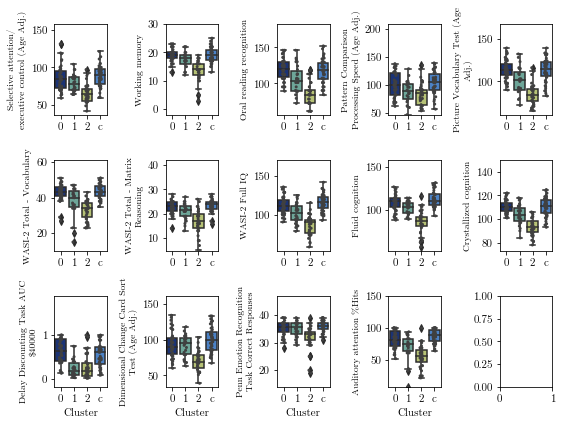

In [75]:
pl.plot_boxplots(cog_data_cluster, col_cog_repr, col_cog_names_repr, 3,5,control=True)
plt.savefig('fig/clu_cog_pat_repr.svg', dpi=500, bbox_inches='tight')

## First 10 components of PCA an cog data patients only

In [114]:
cog_data_cluster = cog_data.copy()

In [115]:
cog_data_cluster['cluster'] = predict_all
clu_0, clu_1, clu_2 = ana.get_cluster_data(cog_data_cluster, 0), ana.get_cluster_data(cog_data_cluster, 1), ana.get_cluster_data(cog_data_cluster, 2)
col_cog = ['acpt01_auditory_t9', 'acpt01_auditory_t6',
       'cogcomp01_nih_fluidcogcomp_unadjusted', 'acpt01_auditory_t11',
       'cogcomp01_nih_crycogcomp_unadjusted', 'acpt01_auditory_t4',
       'acpt01_auditory_t1', 'lswmt01_tbx_ls', 'acpt01_auditory_t14',
       'orrt01_read_acss']
col_cog_names = ['Auditory attention t9', 'Auditory attention t6',
       'Fluid cognition', 'Auditory attention t11',
       'Crystallized cognition', 'Auditory attention t4',
       'Auditory attention t1', 'Working memory', 'Auditory attention t14',
       'Oral reading recognition']
df_comparison = ana.group_comparison(cog_data_cluster, col_cog, cluster=True)
df_comparison.columns = col_cog_names

In [116]:
df_comparison

,Auditory attention t9,Auditory attention t6,Fluid cognition,Auditory attention t11,Crystallized cognition,Auditory attention t4,Auditory attention t1,Working memory,Auditory attention t14,Oral reading recognition
test,,,,,,,,,,
group,"[35.2302, 0.0]","[34.2965, 0.0]","[51.2159, 0.0]","[41.143, 0.0]","[62.3887, 0.0]","[26.3854, 0.0]","[24.2559, 0.0]","[46.5766, 0.0]","[39.7088, 0.0]","[52.5986, 0.0]"
0-1,"[0.3517, 0.6485]","[0.3444, 0.6456]","[7.0372, 0.0462]","[3.5811, 0.1078]","[11.9117, 0.0027]","[0.1513, 0.6809]","[0.1709, 0.6609]","[7.1092, 0.0161]","[4.5741, 0.0517]","[9.1128, 0.0072]"
0-2,"[29.9443, 0.0]","[29.2624, 0.0]","[43.1405, 0.0]","[37.2404, 0.0]","[56.7177, 0.0]","[20.2486, 0.0]","[18.4021, 0.0]","[43.7058, 0.0]","[37.3364, 0.0]","[48.6452, 0.0]"
1-2,"[19.8889, 0.0]","[19.2309, 0.0]","[24.8741, 0.0]","[18.0597, 0.0001]","[19.932, 0.0001]","[18.5595, 0.0]","[17.3046, 0.0]","[14.8423, 0.0004]","[14.1895, 0.0004]","[16.6427, 0.0002]"


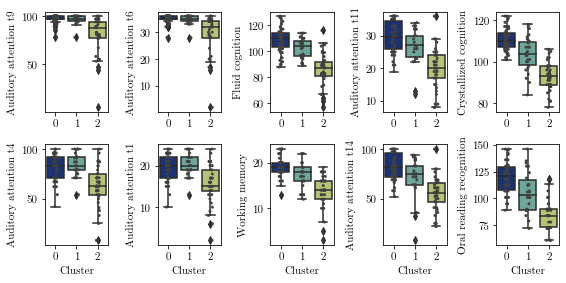

In [91]:
pl.plot_boxplots(cog_data_cluster, col_cog, col_cog_names)

In [15]:
cog_data_cluster = cog_data.copy()
cog_data_cluster['cluster'] = predict_all
cog_data_cluster = cog_data_cluster.append(cog_data_con)
cog_data_cluster.loc[subj_data_.phenotype == 0, 'cluster'] = 'c'
col_cog = ['acpt01_auditory_t9', 'acpt01_auditory_t6',
       'cogcomp01_nih_fluidcogcomp_unadjusted', 'acpt01_auditory_t11',
       'cogcomp01_nih_crycogcomp_unadjusted', 'acpt01_auditory_t4',
       'acpt01_auditory_t1', 'lswmt01_tbx_ls', 'acpt01_auditory_t14',
       'orrt01_read_acss']
col_cog_names = ['Auditory attention t9', 'Auditory attention t6',
       'Fluid cognition', 'Auditory attention t11',
       'Crystallized cognition', 'Auditory attention t4',
       'Auditory attention t1', 'Working memory', 'Auditory attention t14',
       'Oral reading recognition']

In [16]:
clu_0, clu_1, clu_2, con = ana.get_cluster_data(cog_data_cluster, 0), ana.get_cluster_data(cog_data_cluster, 1), ana.get_cluster_data(cog_data_cluster, 2), ana.get_cluster_data(cog_data_cluster, 'c')
df_comparison = ana.group_comparison_control(cog_data_cluster, col_cog)
df_comparison.columns = col_cog_names

In [17]:
df_comparison

,Auditory attention t9,Auditory attention t6,Fluid cognition,Auditory attention t11,Crystallized cognition,Auditory attention t4,Auditory attention t1,Working memory,Auditory attention t14,Oral reading recognition
test,,,,,,,,,,
group,"[51.9546, 0.0]","[51.1166, 0.0]","[71.4238, 0.0]","[65.5633, 0.0]","[74.6863, 0.0]","[43.8347, 0.0]","[41.6946, 0.0]","[56.2852, 0.0]","[65.1796, 0.0]","[63.9554, 0.0]"
0-1,"[0.3517, 0.6034]","[0.3444, 0.6008]","[7.0372, 0.0305]","[3.5811, 0.0751]","[11.9117, 0.0028]","[0.1513, 0.7748]","[0.1709, 0.7372]","[7.1092, 0.0165]","[4.5741, 0.0396]","[9.1128, 0.0047]"
0-2,"[29.9443, 0.0]","[29.2624, 0.0]","[43.1405, 0.0]","[37.2404, 0.0]","[56.7177, 0.0]","[20.2486, 0.0]","[18.4021, 0.0]","[43.7058, 0.0]","[37.3364, 0.0]","[48.6452, 0.0]"
0-c,"[4.1976, 0.0987]","[4.216, 0.0957]","[2.384, 0.1908]","[5.3692, 0.0416]","[0.0096, 0.8799]","[6.4001, 0.0168]","[6.2654, 0.0172]","[0.0045, 0.8422]","[5.2209, 0.0463]","[0.7952, 0.4603]"
1-2,"[19.8889, 0.0]","[19.2309, 0.0]","[24.8741, 0.0002]","[18.0597, 0.0007]","[19.932, 0.0002]","[18.5595, 0.0001]","[17.3046, 0.0001]","[14.8423, 0.0005]","[14.1895, 0.0021]","[16.6427, 0.0003]"
1-c,"[5.8766, 0.0545]","[5.909, 0.0525]","[14.9056, 0.0011]","[17.1067, 0.0004]","[9.2373, 0.0042]","[4.6617, 0.081]","[4.1742, 0.0912]","[5.3209, 0.0259]","[18.0305, 0.0002]","[5.6542, 0.028]"
2-c,"[39.8194, 0.0]","[39.4788, 0.0]","[51.3089, 0.0]","[48.699, 0.0]","[49.3675, 0.0]","[36.3054, 0.0]","[35.5544, 0.0]","[38.8377, 0.0]","[48.8791, 0.0]","[44.2968, 0.0]"


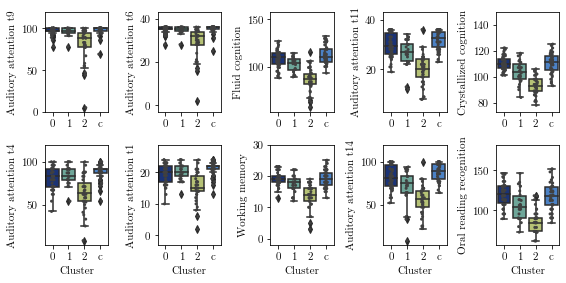

In [149]:
pl.plot_boxplots(cog_data_cluster, col_cog, col_cog_names, control=True)
plt.savefig('fig/clu_cog_pat.svg', dpi=500, bbox_inches='tight')

# K-Means Clustering

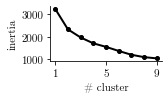

In [19]:
K, inertia = ana.get_intertia(cog_data_z_pca, 9)
pl.plot_inertia(K, inertia)

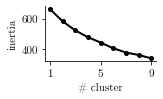

In [20]:
K, inertia = ana.get_intertia(brain_data_z_fa, 9)
pl.plot_inertia(K, inertia)

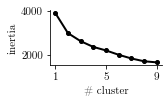

In [21]:
K, inertia = ana.get_intertia(all_data_z_pcafa, 9)
pl.plot_inertia(K, inertia)

Cognitive Data, PCA
K-Means


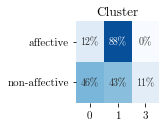

Spectral


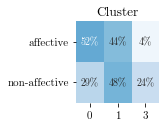

In [22]:
k=3
print('Cognitive Data, PCA')
print('K-Means')
predict, df = ana.K_Means(cog_data_z_pca, k, subj_data, patients_only=True)
pl.plot_cluster_result(df, patients_only=True)
plt.show()

print('Spectral')
predict, df = ana.Spectral(cog_data_z_pca, k, subj_data, patients_only=True)
pl.plot_cluster_result(df, patients_only=True)

Brain Data, FA
K-Means


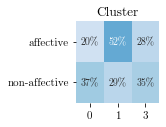

Spectral


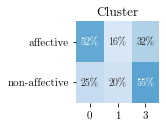

In [24]:
k=3
print('Brain Data, FA')
print('K-Means')
predict, df = ana.K_Means(brain_data_z_fa, k, subj_data, patients_only=True)
pl.plot_cluster_result(df, patients_only=True)
plt.show()

print('Spectral')
predict, df = ana.Spectral(brain_data_z_fa, k, subj_data, patients_only=True)
pl.plot_cluster_result(df, patients_only=True)

all Data, cog-PCA, brain-PCA
K-Means


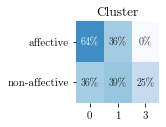

Spectral


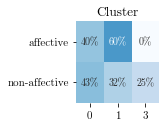

In [32]:
k=3
print('all Data, cog-PCA, brain-PCA')
print('K-Means')
predict, df = ana.K_Means(all_data_z_pcafa, k, subj_data, patients_only=True)
pl.plot_cluster_result(df, patients_only=True)
plt.show()

print('Spectral')
predict, df = ana.Spectral(all_data_z_pcafa, k, subj_data, patients_only=True)
pl.plot_cluster_result(df, patients_only=True)